# Problem Set #9
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: March 16, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## (a)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
cultivar      176 non-null int64
alco          176 non-null float64
malic         176 non-null float64
ash           176 non-null float64
alk           176 non-null float64
magn          176 non-null int64
tot_phen      176 non-null float64
flav          176 non-null float64
nonfl_phen    176 non-null float64
proanth       176 non-null float64
color_int     176 non-null float64
hue           176 non-null float64
OD280rat      176 non-null float64
proline       176 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.3 KB


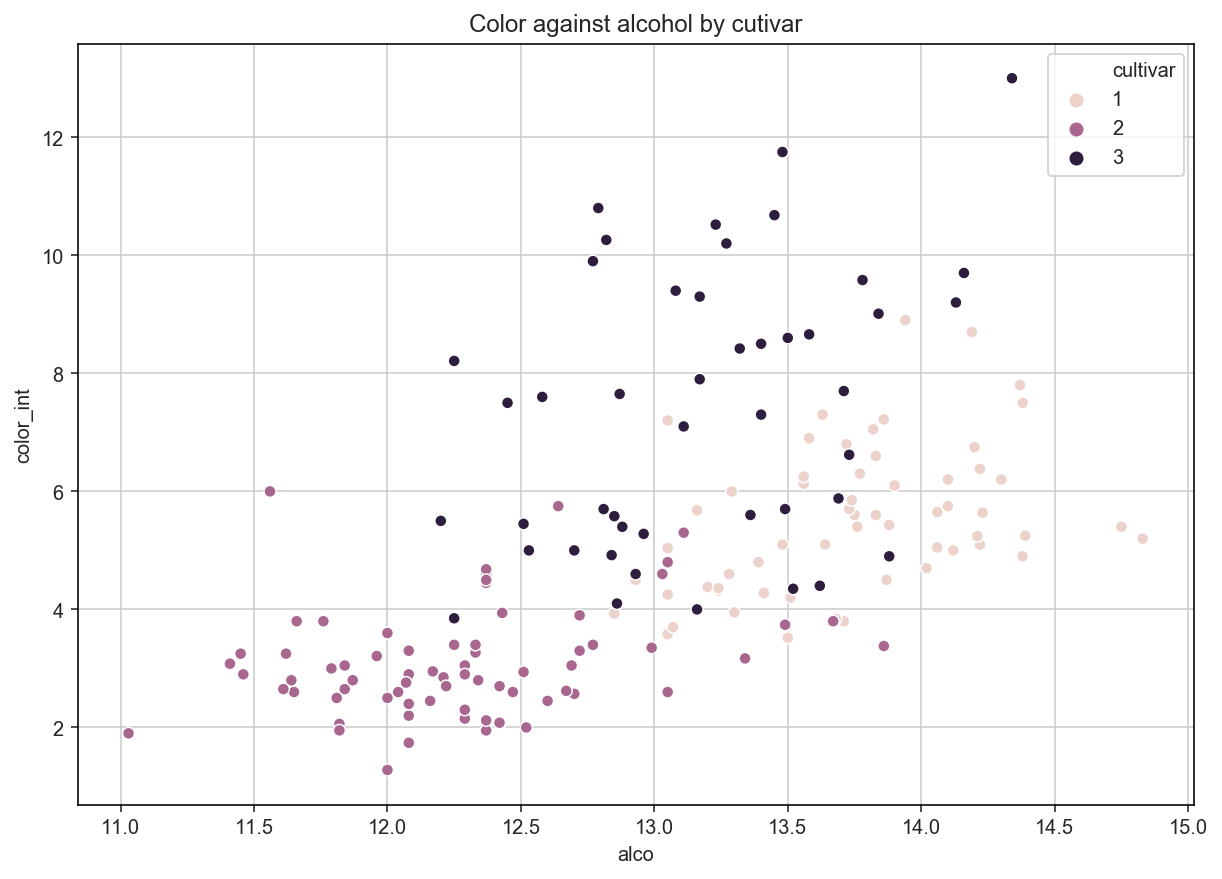

In [4]:
sns.set_style('whitegrid',{'axes.edgecolor': 'k', "xtick.bottom" : True, "ytick.left" : True})
plt.figure(figsize=(10, 7))
sns.scatterplot(x = 'alco', y = 'color_int', hue = 'cultivar', legend = 'full', data = df)\
    .set_title('Color against alcohol by cutivar');

## (b)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform

X = df.loc[:,['alco','malic','tot_phen','color_int']]
y = df['cultivar'].values

param_dist1 = {'penalty': ['l1', 'l2'],
               'C'      : sp_uniform(0.1,10)}

lg = LogisticRegression(solver = 'liblinear',multi_class = 'ovr', 
                        max_iter = 200, random_state = 25)

clf_lg = RandomizedSearchCV(lg, param_dist1, n_iter = 200,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
clf_lg.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=200,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=25,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid=False, n_iter=200, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1102a66a0>,
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=25, refit=True,
                   

In [6]:
print('- Optimal tuning parameter values:\n',clf_lg.best_params_)
print('\n- Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf_lg.best_score_))

- Optimal tuning parameter values:
 {'C': 2.665871587495725, 'penalty': 'l1'}

- Mean cross-validated MSE of the best_estimator: 0.1168


## (c)

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from scipy.stats import randint as sp_randint


param_dist2 = {'n_estimators'     : sp_randint(10, 200),
               'max_depth'        : sp_randint(2, 4),
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf' : sp_randint(2,20),
               'max_features'     : sp_randint(1,4)}


rf = RandomForestClassifier()

clf_rf = RandomizedSearchCV(rf, param_dist2, n_iter = 200,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
clf_rf.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [8]:
print('- Optimal tuning parameter values:\n',clf_rf.best_params_)
print('\n- Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf_rf.best_score_))

- Optimal tuning parameter values:
 {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 170}

- Mean cross-validated MSE of the best_estimator: 0.1236


## (d)

In [9]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

param_dist3 = {'C'        : sp_uniform(loc = 0.1,scale = 10.0),
               'gamma'    : ['scale','auto'],
               'shrinking': [True,False]}

svm = SVC(kernel='rbf')

clf_sv = RandomizedSearchCV(svm, param_dist3, n_iter = 200,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
clf_sv.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid=False, n_iter=200, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x124406f28>,
                                        'gamma': ['scale', 'auto'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=25, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [10]:
print('- Optimal tuning parameter values:\n',clf_sv.best_params_)
print('\n- Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf_sv.best_score_))

- Optimal tuning parameter values:
 {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}

- Mean cross-validated MSE of the best_estimator: 0.1335


## (e)

In [11]:
from sklearn.neural_network import MLPClassifier

param_dist4 = {'hidden_layer_sizes': sp_randint(1,100),
               'activation'        : ['logistic','relu'],
               'alpha'             : sp_uniform(0.1,10.0)}

mlp = MLPClassifier(solver = 'lbfgs')

clf_mlp = RandomizedSearchCV(mlp, param_dist4, n_iter = 200,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
clf_mlp.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rand...
                   iid=False, n_iter=200, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'alpha': <s

In [12]:
print('- Optimal tuning parameter values:\n',clf_mlp.best_params_)
print('\n- Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf_mlp.best_score_))

- Optimal tuning parameter values:
 {'activation': 'relu', 'alpha': 0.7965389843643799, 'hidden_layer_sizes': 91}

- Mean cross-validated MSE of the best_estimator: 0.0833


## (f)

Since the MSE from neural network model of `cultivar` is the lowest, `MLPClassifier` is the best predictor.

---
I learned a lot from this wonderful class. Thank you for your support!